In [65]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris(as_frame = True)
df = iris.frame
df['target'] = df['target'].map(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
df.groupby('target')['sepal length (cm)'].mean()

target
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

In [69]:
df.groupby('target').agg({'sepal length (cm)':['mean', 'std', 'max'], 'petal length (cm)':['median', 'min']}).T

target                     setosa  versicolor  virginica
sepal length (cm) mean    5.00600    5.936000    6.58800
                  std     0.35249    0.516171    0.63588
                  max     5.80000    7.000000    7.90000
petal length (cm) median  1.50000    4.350000    5.55000
                  min     1.00000    3.000000    4.50000

In [71]:
df.groupby('target').describe().T

target                      setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.600000   6.225000
                  50%     5.000000    5.900000   6.500000
                  75%     5.200000    6.300000   6.900000
                  max     5.800000    7.000000   7.900000
sepal width (cm)  count  50.000000   50.000000  50.000000
                  mean    3.428000    2.770000   2.974000
                  std     0.379064    0.313798   0.322497
                  min     2.300000    2.000000   2.200000
                  25%     3.200000    2.525000   2.800000
                  50%     3.400000    2.800000   3.000000
                  75%     3.675000    3.000000   3.175000
                  max     4.400000    3.400000   3.800000
petal length (cm) count  50.000000   50.000000  50.000000
                  mean    1.462000    4.260000   5.552000
                  std     0.173664    0.469911   0.551895
                  min     1.000000    3.000000   4.500000
                  25%     1.400000    4.000000   5.100000
                  50%     1.500000    4.350000   5.550000
                  75%     1.575000    4.600000   5.875000
                  max     1.900000    5.100000   6.900000
petal width (cm)  count  50.000000   50.000000  50.000000
                  mean    0.246000    1.326000   2.026000
                  std     0.105386    0.197753   0.274650
                  min     0.100000    1.000000   1.400000
                  25%     0.200000    1.200000   1.800000
                  50%     0.200000    1.300000   2.000000
                  75%     0.300000    1.500000   2.300000
                  max     0.600000    1.800000   2.500000

In [73]:
df['z_sepal_length'] = df.groupby('target')['sepal length (cm)'].transform(lambda x:(x - x.mean())/x.std())
df[['target', 'sepal length (cm)', 'z_sepal_length']].head(10)

,target,sepal length (cm),z_sepal_length
0,setosa,5.1,0.266674
1,setosa,4.9,-0.300718
2,setosa,4.7,-0.868111
3,setosa,4.6,-1.151807
4,setosa,5.0,-0.017022
5,setosa,5.4,1.117763
6,setosa,4.6,-1.151807
7,setosa,5.0,-0.017022
8,setosa,4.4,-1.719199
9,setosa,4.9,-0.300718


In [75]:
def custom_summary(group):
    return pd.Series({'sepal_max':group['sepal length (cm)'].max(), 'sepal_min':group['sepal length (cm)'].min(), 'sepal_median':group['sepal length (cm)'].median(), 'sepal_iqr':group['sepal length (cm)'].quantile(0.75) - group['sepal length (cm)'].quantile(0.25)})

In [77]:
df.groupby('target')[['sepal length (cm)', 'petal width (cm)']].apply(custom_summary)

,sepal_max,sepal_min,sepal_median,sepal_iqr
target,,,,
setosa,5.8,4.3,5.0,0.400
versicolor,7.0,4.9,5.9,0.700
virginica,7.9,4.9,6.5,0.675


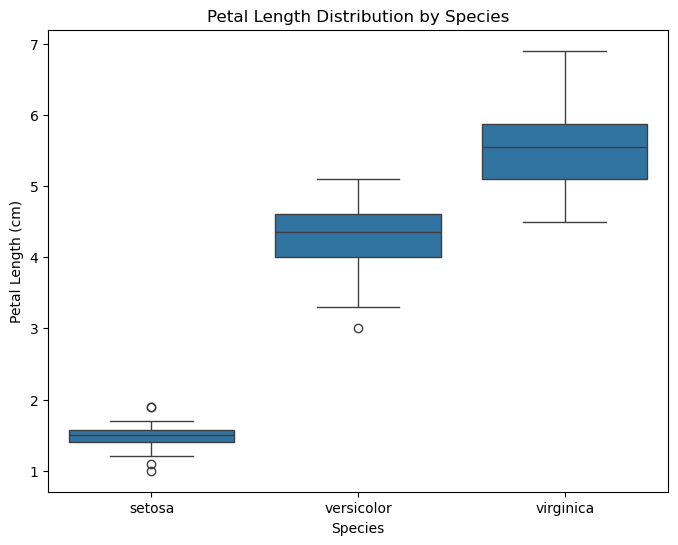

In [79]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'target', y = 'petal length (cm)')
plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

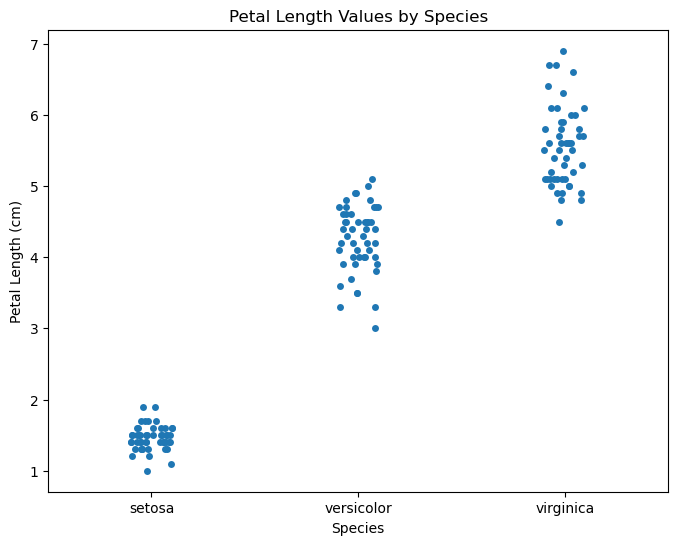

In [81]:
plt.figure(figsize = (8,6))
sns.stripplot(data = df, x = 'target', y = 'petal length (cm)', jitter = True)
plt.title('Petal Length Values by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()